<a href="https://colab.research.google.com/github/ilinashah177/Coursework-Website/blob/main/T_test_per_capita_greenhouse_gas_emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This tells python to draw the graphs "inline" - in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import seaborn as sns

import pylab
import pandas as pd
import numpy as np
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving per-capita-ghg-emissions.csv to per-capita-ghg-emissions.csv


In [ ]:
df=pd.read_csv('per-capita-ghg-emissions.csv')
df

,Entity,Code,Year,Per capita greenhouse gas emissions in CO₂ equivalents
0,Pakistan,PAK,1850,1.328058
1,Pakistan,PAK,1851,1.337347
2,Pakistan,PAK,1852,1.345762
3,Pakistan,PAK,1853,1.352824
4,Pakistan,PAK,1854,1.361163
...,...,...,...,...
169,Pakistan,PAK,2019,2.165390
170,Pakistan,PAK,2020,2.257676
171,Pakistan,PAK,2021,2.321775
172,Pakistan,PAK,2022,2.192391


STEP 1

HO: There is no difference between mean greenhouse gas emissions per capita in Pakistan pre-2015 and post-2015


H1: There is a difference between mean greenhouse gas emissions per capita in Pakistan pre-2015 and post-2015

STEP 2
We are using a 95% significance level, given there are less than 1000 values in the dataframe we calculate the critical value as follows:

In [ ]:
from scipy.stats import t

pre_2015_emissions = df[df['Year'] < 2015]['Per capita greenhouse gas emissions in CO₂ equivalents'].values
post_2015_emissions = df[df['Year'] >= 2015]['Per capita greenhouse gas emissions in CO₂ equivalents'].values

degrees_of_freedom = len(pre_2015_emissions) + len(post_2015_emissions) - 2

critical_value = t.ppf(0.975, degrees_of_freedom)

print(f"Critical Value: {critical_value}")

Critical Value: 1.9738521694896134


Therefore, our corresponding critical value for a two-tailed t-test in this context is 1.97.

STEP 3: Calculating the Test Statistic as follows:

In [ ]:
def manual_ttest(group1, group2, plot=False): # define a function called "manual_ttest" that takes two groups and a boolean value for whether or not to plot the results as arguments

    desc1, desc2=group1.describe(), group2.describe() # get descriptive statistics for both samples

    n1,std1,mean1 = desc1['count'], desc1['std'] ,desc1['mean'] # get the sample size, standard deviation, and mean of the first sample
    n2,std2,mean2 = desc2['count'], desc2['std'] ,desc2['mean'] # get the sample size, standard deviation, and mean of the second sample

    # calculate standard errors
    se1, se2 = std1**2/n1, std2**2/n2 # '**2' is the same as squaring the number

    # standard error on the difference between the samples
    sed = np.sqrt(se1 + se2)

    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed

    # print the results
    print("Group 1: n=%.0f, mean=%.3f, std=%.3f" % (n1,mean1,std1))
    print("Group 2: n=%.0f, mean=%.3f, std=%.3f" % (n2,mean2,std2))
    print('The t-statistic is %.3f' % t_stat) # print the t-statistic

    if plot==True: # if the plot argument is set to True, plot the results
        groups=pd.DataFrame() # create an empty dataframe
        i=1 # create a counter variable called "i" and set it equal to 1

        for group in [group1, group2]: # loop through each group in the list of groups
            plot_df=pd.DataFrame({'Values': group,'Group':i}) # create a dataframe with the values of the group and a column called "Group" that contains the group number
            groups=groups.append(plot_df) # append the dataframe to the list of dataframes
            i+=1 # increase the counter by 1

        sns.pointplot(data=groups , x='Group', y='Values',errorbar=('ci', 95), color='black', join=False, capsize=.8) # plot the means of the groups with a 95% confidence interval
        plt.title('Comparison of Group Means with 95% Confidence Intervals') # add a title

    return t_stat # return the t-statistic

In [ ]:
pre_2015_emissions = df[df['Year'] < 2015]['Per capita greenhouse gas emissions in CO₂ equivalents']
post_2015_emissions = df[df['Year'] >= 2015]['Per capita greenhouse gas emissions in CO₂ equivalents']

t = manual_ttest(pre_2015_emissions,post_2015_emissions)

Group 1: n=165, mean=1.649, std=0.245
Group 2: n=9, mean=2.159, std=0.118
The t-statistic is -11.702


STEP 4: Making a Decision

In [ ]:
def plot_z(test_statistic):
    mu, se= 0, 1 # create two variables, a mean "mu" equal to zero, and standard deviation "se" equal to 1
    x = np.linspace(mu - 3*se, mu + 3*se, 100) # create a range of values from -3 to 3 standard deviations

    plt.plot(x, norm.pdf(x, mu, se)) # plot the normal distribution
    plt.axvline(mu-se*1.97, color='blue', linestyle='dashed', linewidth=1.5,label='µ ± 1.96σ (95% confidence)') # plot a vertical line at the mean plus 2 standard deviations
    plt.axvline(mu+se*1.97, color='blue', linestyle='dashed', linewidth=1.5)  # plot a vertical line at the mean minus 2 standard deviations

    plt.axvline(test_statistic, color='red', linestyle='solid', linewidth=1.5,label='Test Statistic') # plot a vertical line at the test statistic


    plt.ylim(0,0.4)
    plt.legend()
    plt.title('Z Distribution') # add a title
    plt.show()

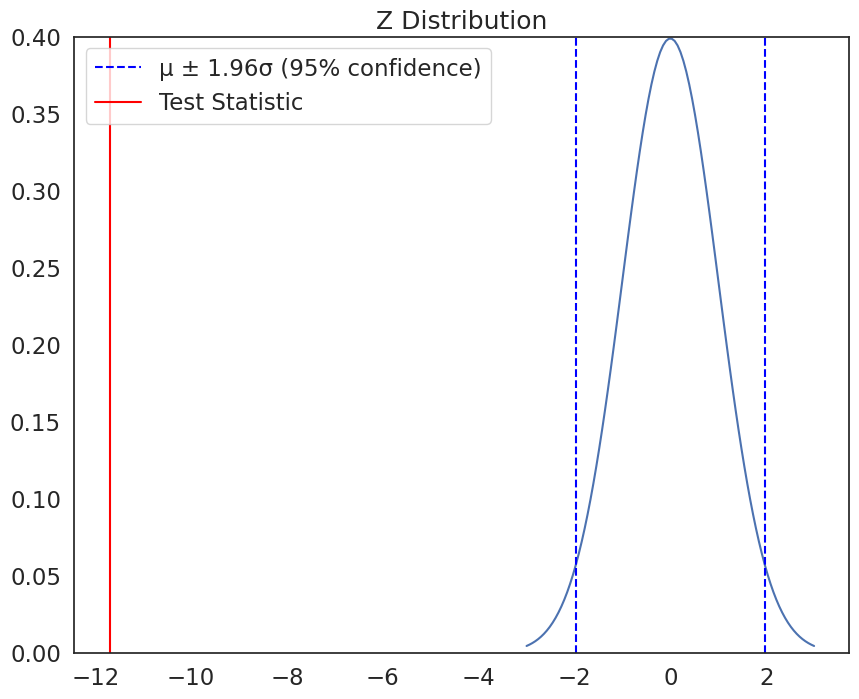

In [ ]:
plot_z(t) # plot the test statistic on the z distribution

In [ ]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(pre_2015_emissions, post_2015_emissions, equal_var=False)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -11.70168708862158
P-value: 5.454117037683472e-08


We can see from the graph that the t-statistic of -11.7 is significanly smaller than -1.97 indicating the mean greenhouse gas emissions per capita pre-2015 is significantly different to the mean greenhouse gas emissions per capita post-2015. The p-value of less than 0.00001 indicates the same result.

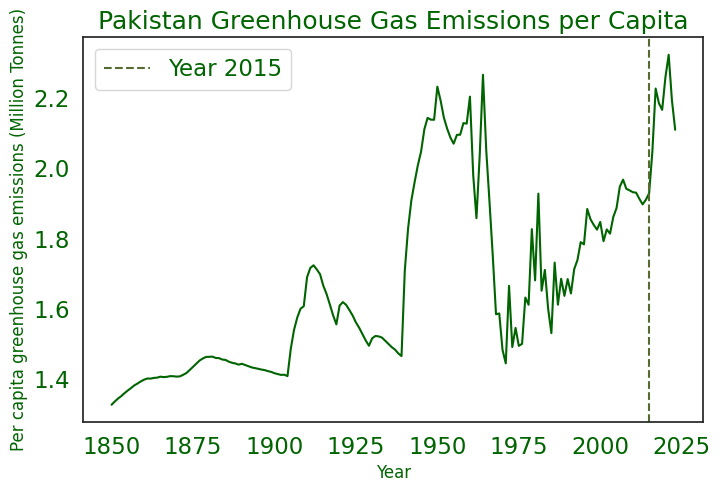

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import matplotlib.dates as mdates
from matplotlib.pyplot import figure

figure(figsize=(8, 5), dpi=100)

years = df['Year']
emissions = df['Per capita greenhouse gas emissions in CO₂ equivalents']


plt.plot(years, emissions, color='#006400')
plt.xlabel('Year', color='darkgreen', fontsize=12)
plt.ylabel('Per capita greenhouse gas emissions (Million Tonnes)', color='darkgreen', fontsize=12)

plt.axvline(2015, color='#556B2F', linestyle='dashed', label='Year 2015')

plt.tick_params(axis='x', colors='darkgreen')
plt.tick_params(axis='y', colors='darkgreen')

for label in plt.gca().get_xticklabels():
    label.set_color('darkgreen')

for label in plt.gca().get_yticklabels():
    label.set_color('darkgreen')


plt.legend(labelcolor='darkgreen')
plt.title('Pakistan Greenhouse Gas Emissions per Capita', color='darkgreen')


plt.show()
